## C1 

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

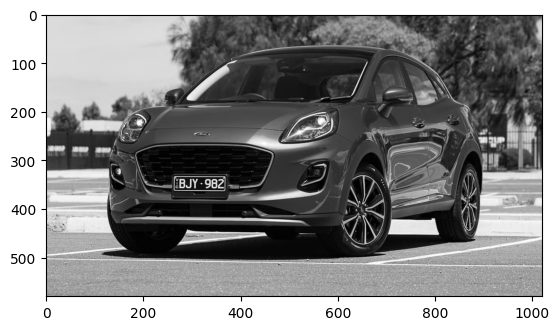

In [64]:
img = cv2.imread('../../data/image/image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

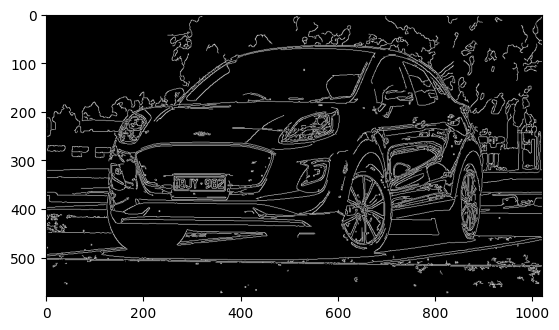

In [65]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [66]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

In [67]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [68]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [69]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

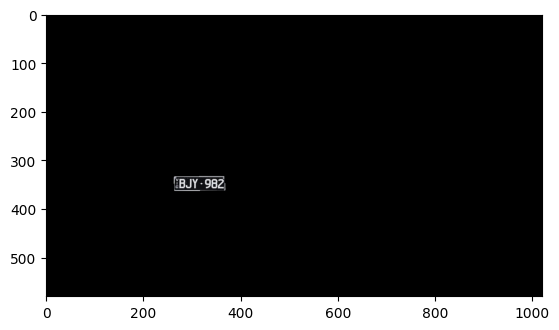

In [70]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [71]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

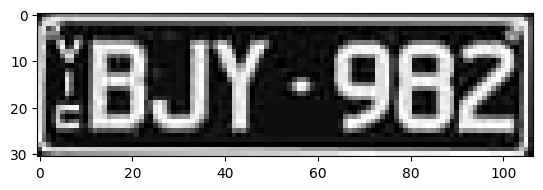

In [72]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [73]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3741937983327902)]

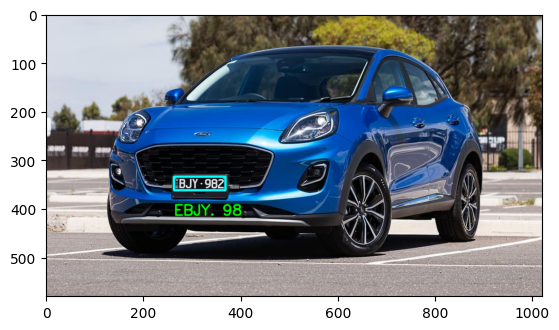

In [75]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+50), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (255,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

---

## C2 : dùng yolo phát hiện biển số


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

license_plate_detector = YOLO('./license_plate_detector.pt')

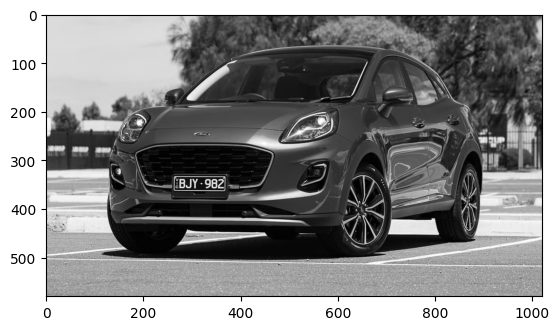

In [2]:
img = cv2.imread('../../data/image/image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Xác định tọa độ biển số xe

In [3]:
x1, y1, x2, y2, score, class_id = license_plate_detector(img)[0].boxes.data.tolist()[0]
x1, y1, x2, y2, score, class_id


0: 384x640 1 license_plate, 207.0ms
Speed: 13.5ms preprocess, 207.0ms inference, 21.0ms postprocess per image at shape (1, 3, 384, 640)


(252.89447021484375,
 325.11419677734375,
 381.67156982421875,
 372.70904541015625,
 0.691777765750885,
 0.0)

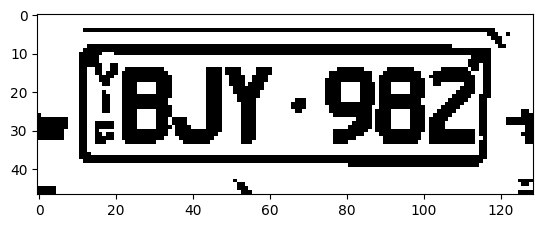

In [7]:
result = img[int(y1):int(y2), int(x1): int(x2), :]
license_plate_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_, license_plate_thresh = cv2.threshold(license_plate_gray, 64, 255, cv2.THRESH_BINARY_INV) # chuyển về ảnh nhị phân
plt.imshow(cv2.cvtColor(license_plate_thresh, cv2.COLOR_BGR2RGB))

In [12]:
reader = easyocr.Reader(['en'])
result_plate = reader.readtext(license_plate_thresh)
result_plate[0][-2]

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


'BJY. 982'